<a href="https://colab.research.google.com/github/hisenberg2077/Pytorch-Codes/blob/main/Regression_01_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
w = 0.3
b = 0.5

X = torch.arange(0,5,0.01).unsqueeze(1)
y = w*X + b

len(X)
len(y)

500

In [3]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.5000],
         [0.5030],
         [0.5060],
         [0.5090],
         [0.5120],
         [0.5150],
         [0.5180],
         [0.5210],
         [0.5240],
         [0.5270]]))

In [4]:
split = int(0.8*len(X))

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

len(X_test), len(y_test), len(X_train), len(y_train)



(100, 100, 400, 400)

In [5]:
def plotfunction(y_preds = None):
  plt.figure(figsize = (10,7))

  plt.scatter(X_train, y_train, c = 'k', s = 3, label = 'Training Data')

  plt.scatter(X_test, y_test, c = 'b', s = 3, label = 'Test Data')

  if y_preds is not None:
    plt.scatter(X_test, y_preds, c = 'r', s = 3, label = 'Prediction Data')


  plt.legend()



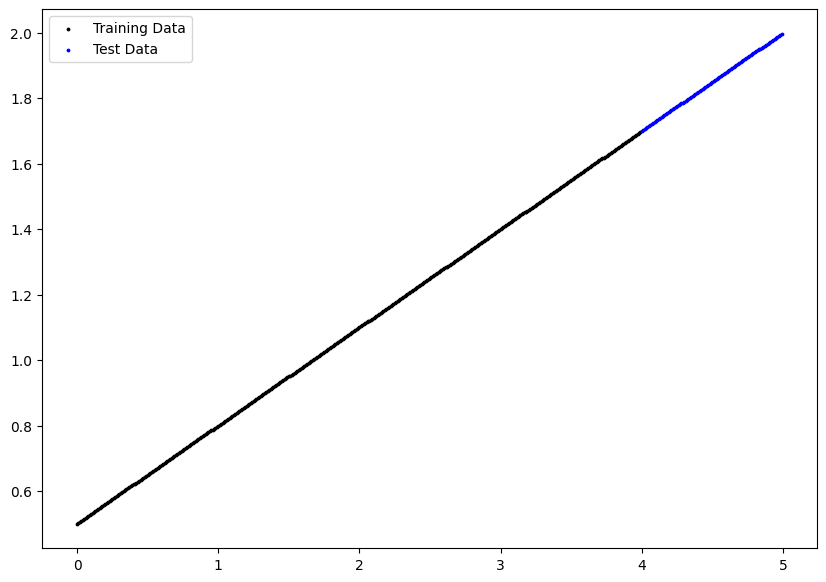

In [6]:
plotfunction()

In [7]:
class LinearModel(nn.Module):

  def __init__ (self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1, requires_grad = True, dtype = torch.float))

    self.bias = nn.Parameter(torch.rand(1, requires_grad = True, dtype=torch.float))

  def forward(self, x: torch.tensor) -> torch.Tensor:
    return self.weight*x + self.bias


In [8]:
model0 = LinearModel()

In [9]:
model0.state_dict()

OrderedDict([('weight', tensor([0.5159])), ('bias', tensor([0.9197]))])

In [10]:
with torch.inference_mode():
  y_preds = model0(X_test)

model0.weight, model0.bias, X_test[:10], y_preds[:10], y_test[:10]

(Parameter containing:
 tensor([0.5159], requires_grad=True),
 Parameter containing:
 tensor([0.9197], requires_grad=True),
 tensor([[4.0000],
         [4.0100],
         [4.0200],
         [4.0300],
         [4.0400],
         [4.0500],
         [4.0600],
         [4.0700],
         [4.0800],
         [4.0900]]),
 tensor([[2.9835],
         [2.9886],
         [2.9938],
         [2.9990],
         [3.0041],
         [3.0093],
         [3.0144],
         [3.0196],
         [3.0248],
         [3.0299]]),
 tensor([[1.7000],
         [1.7030],
         [1.7060],
         [1.7090],
         [1.7120],
         [1.7150],
         [1.7180],
         [1.7210],
         [1.7240],
         [1.7270]]))

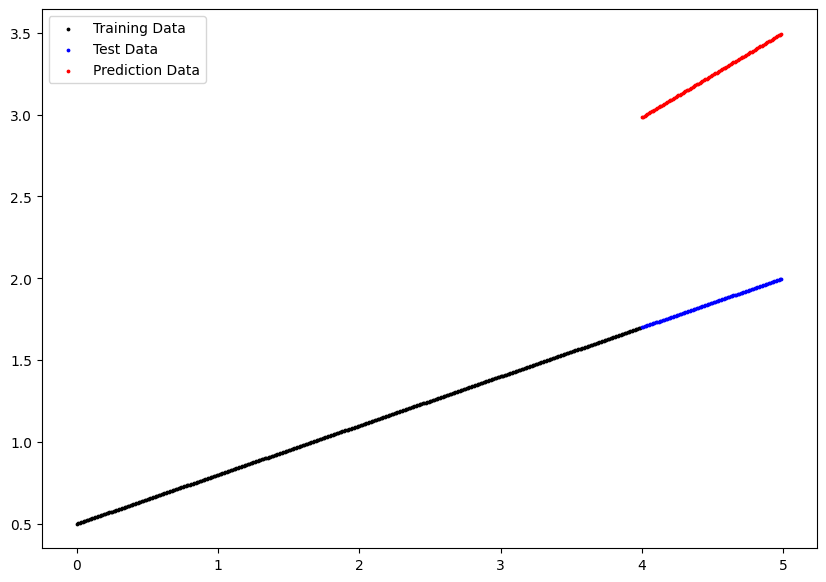

In [11]:
plotfunction(y_preds)

In [12]:
lossfunction = nn.L1Loss()

optimizer = torch.optim.SGD(params = model0.parameters(), lr=0.001)

In [13]:
list(model0.parameters())

[Parameter containing:
 tensor([0.5159], requires_grad=True),
 Parameter containing:
 tensor([0.9197], requires_grad=True)]

In [14]:
epoch_count = []
train_loss = []
test_loss = []


epochs = 1000

for epoch in range (epochs):
  model0.train() #training mode

  #forward pass
  train_preds = model0(X_train)

  loss = lossfunction(train_preds, y_train)

  #gradzero
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #TESTINGGGG
  model0.eval()

  with torch.inference_mode():
    test_preds = model0(X_test)
    loss_of_preds = lossfunction(test_preds, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss.append(loss.detach().numpy())
      test_loss.append(loss_of_preds.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {loss_of_preds} ")











Epoch: 0 | MAE Train Loss: 0.8505269885063171 | MAE Test Loss: 1.3803956508636475 
Epoch: 10 | MAE Train Loss: 0.8007264733314514 | MAE Test Loss: 1.2807197570800781 
Epoch: 20 | MAE Train Loss: 0.7509263753890991 | MAE Test Loss: 1.1810448169708252 
Epoch: 30 | MAE Train Loss: 0.7011262774467468 | MAE Test Loss: 1.0813697576522827 
Epoch: 40 | MAE Train Loss: 0.6513262391090393 | MAE Test Loss: 0.9816948175430298 
Epoch: 50 | MAE Train Loss: 0.6015262007713318 | MAE Test Loss: 0.8820197582244873 
Epoch: 60 | MAE Train Loss: 0.5517261028289795 | MAE Test Loss: 0.7823447585105896 
Epoch: 70 | MAE Train Loss: 0.501926064491272 | MAE Test Loss: 0.6826698184013367 
Epoch: 80 | MAE Train Loss: 0.4521259665489197 | MAE Test Loss: 0.582994818687439 
Epoch: 90 | MAE Train Loss: 0.40232589840888977 | MAE Test Loss: 0.48331981897354126 
Epoch: 100 | MAE Train Loss: 0.35252586007118225 | MAE Test Loss: 0.38364478945732117 
Epoch: 110 | MAE Train Loss: 0.30272579193115234 | MAE Test Loss: 0.283969

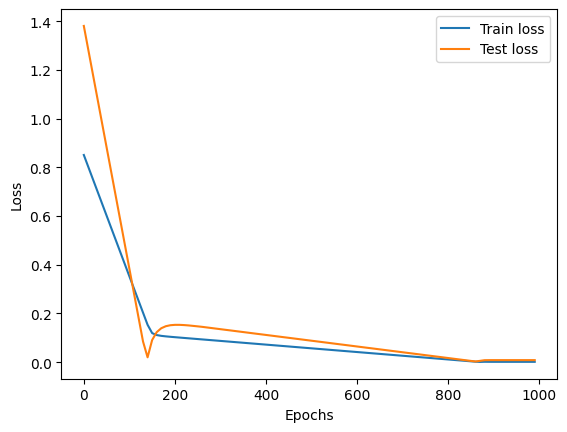

In [15]:
plt.plot(epoch_count, train_loss, label = 'Train loss')
plt.plot(epoch_count, test_loss, label = 'Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

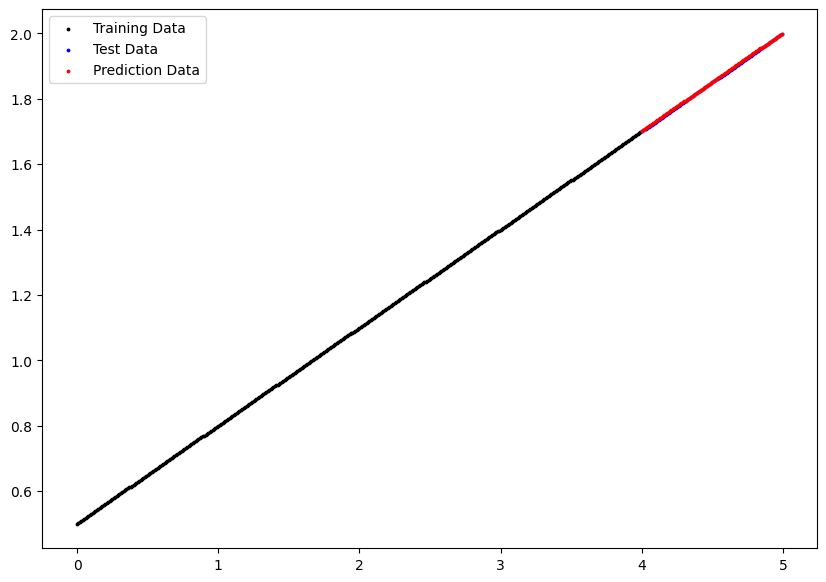

In [16]:
plotfunction(test_preds)